Clément MICHEL MS Data Science ENSAI

In [ ]:
# L'objectif de se projet est de trouver une stratégie optimale pour le jeu du Puissance 4. La stratégie optimale étant de maximiser la chance de victoire du joueur.

# Partie 1 : Définitions du statut, action, reward, transition relatif au jeu du Puissance 4

In [ ]:
# State:

# Configuration actuelle du plateau de jeu:
# On considère le jeu de Puissance 4 classique, le plateau est une grille de 6 lignes et 7 colonnes
# Pour chaque cellule, on a trois options différentes : vide, jeton joueur 1, jeton joueur 2
# On a alors un total de 3^(6*7) states possibles
# Cependant plusieurs situations ne sont pas possibles par les règles, par exemple on ne veut pas avoir de jetons dans des cellules avec aucun jeton en dessous etc
# Il est estimé dans la littérature un nombre total de 1.6 * 10^13 states possibles

In [ ]:
# Action:

# Dans le cas du Puissance 4, l'action correspond au choix d'une colonne dans laquelle un joueur peut insérer son jeton.
# On a autant d'actions différentes que de colonnes, on a alors 7 actions possibles.
# Cependant il faut prendre en compte qu'une colonne peut être déjà complétement rempli, on a alors 7 actions - nombre de colonnes remplies au state actuel

In [ ]:
# Reward:

# On définit le reward comme la valeur de la fonction d'utilité du jeu à la fin de la partie.
# Dans le cas du puissance 4, on définit la récompense comme        : +1 pour le joueur qui gagne
#                                                                     -1 pour le joueur qui perd
#                                                                      0 en cas d'égalité


In [ ]:
# Transition:

# La transition pour le jeu du puissance 4 est la suivante:
# A chaque action d'un joueur, le plateau de jeu est mis à jour en ajoutant la pièce du joueur dans la colonne choisie.
# La pièce tombe alors dans la position la plus basse disponible de la colonne.


# Partie 2: Création du Jeu du Puissance 4, Visualisation et Simulations

On se propose dans un premier temps de créer notre jeu de Puissance 4 qui nous servira de base pour la suite, dans l'exemple suivant, on se propose de créer une partie classique entre 2 joueurs de Puissance 4. Puis de faire jouer des parties entre agents aléatoires, Q learning agent et Deep Q learning agent et de comparer leur résultats.

## Partie classique de Puissance 4 entre 2 joueurs

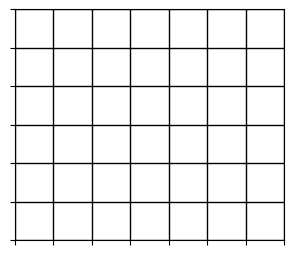

Joueur 1, choisissez une colonne (0-6): 1


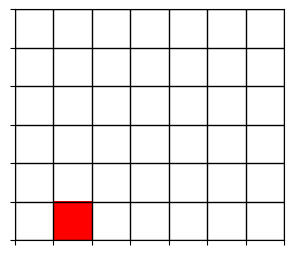

Joueur 2, choisissez une colonne (0-6): 3


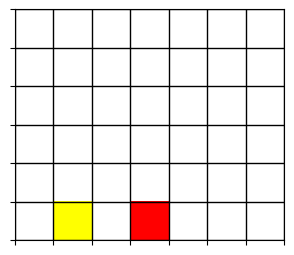

Joueur 1, choisissez une colonne (0-6): 1


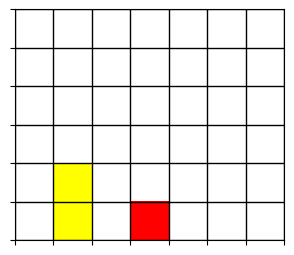

Joueur 2, choisissez une colonne (0-6): 4


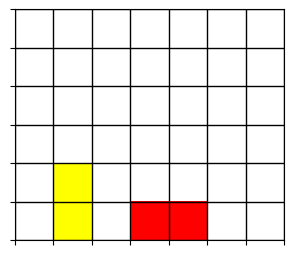

Joueur 1, choisissez une colonne (0-6): 1


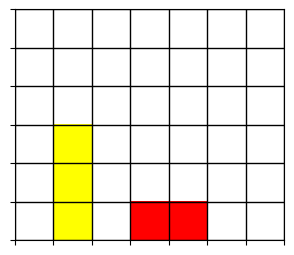

Joueur 2, choisissez une colonne (0-6): 3


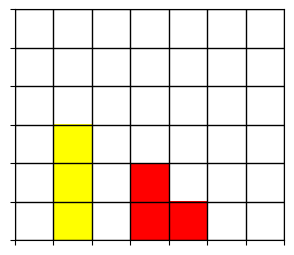

Joueur 1, choisissez une colonne (0-6): 1


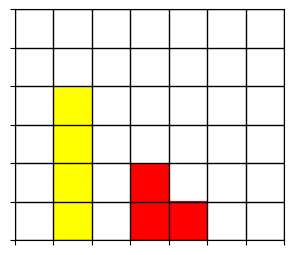

Le joueur 1 a gagné!


In [ ]:
class Puissance4:
    def __init__(self):
        self.board = [[0 for _ in range(7)] for _ in range(6)]
        self.current_player = 1

    def is_valid_action(self, action):
        return self.board[5][action] == 0

    def apply_action(self, action):
        for i in range(6):
            if self.board[i][action] == 0:
                self.board[i][action] = self.current_player
                break
        self.current_player = 3 - self.current_player

    def check_winner(self):
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    continue
                for dr, dc in directions:
                    if self.check_four_in_a_row(row, col, dr, dc):
                        return self.board[row][col]
        return 0

    def check_four_in_a_row(self, row, col, dr, dc):
        player = self.board[row][col]
        for _ in range(3):
            row += dr
            col += dc
            if (
                row < 0
                or row >= 6
                or col < 0
                or col >= 7
                or self.board[row][col] != player
            ):
                return False
        return True

    def is_draw(self):
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    return False
        return True

    def print_board(self):
        for row in self.board:
            print(" ".join(str(cell) for cell in row))
        print("-" * 7)

    def visualisation(self):
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.imshow(np.flipud(self.board), cmap=mcolors.ListedColormap(['white', 'yellow', 'red']))
        ax.grid(True, which='both', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, 7, 1))
        ax.set_yticks(np.arange(-0.5, 6, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def play(self):
        while True:
            self.visualisation()
            try:
                action = int(input(f"Joueur {self.current_player}, choisissez une colonne (0-6): "))
            except ValueError:
                print("Entrée invalide, veuillez entrer un nombre entre 0 et 6.")
                continue

            if not (0 <= action <= 6) or not self.is_valid_action(action):
                print("Entrée invalide, veuillez entrer un nombre entre 0 et 6.")
                continue

            self.apply_action(action)
            winner = self.check_winner()
            if winner != 0:
                self.visualisation()
                print(f"Le joueur {winner} a gagné!")
                break
            if self.is_draw():
                self.visualisation()
                print("Match nul!")
                break


if __name__ == "__main__":
    game = Puissance4()
    game.play()


## Partie classique de Puissance 4 entre deux Random agents

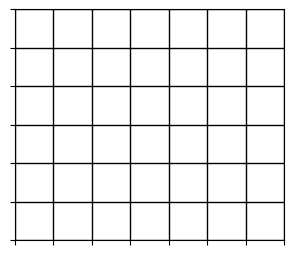

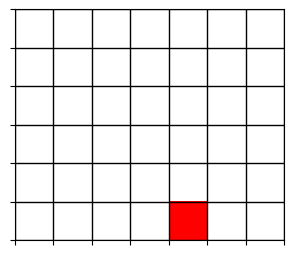

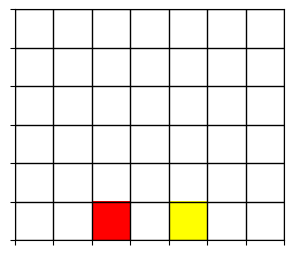

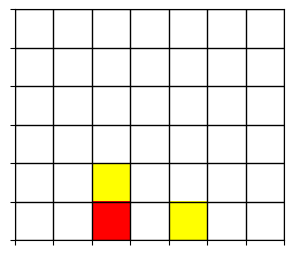

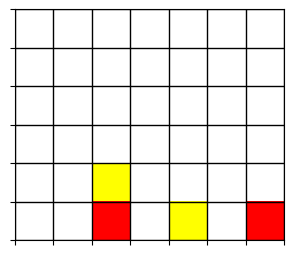

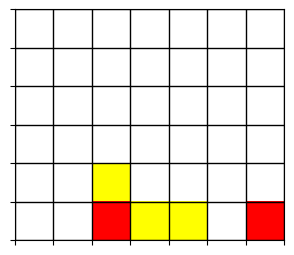

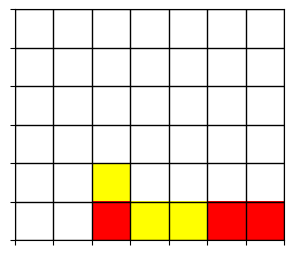

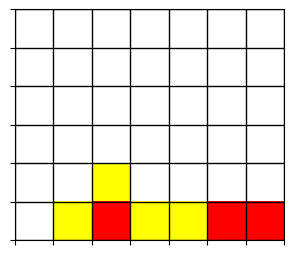

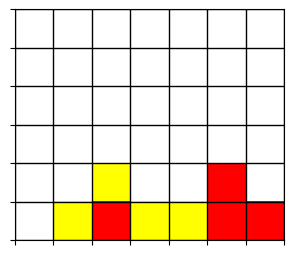

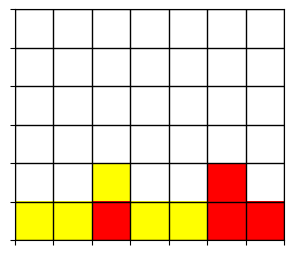

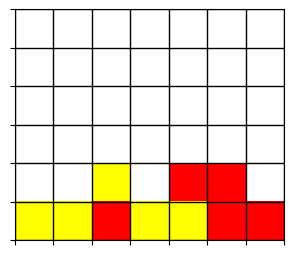

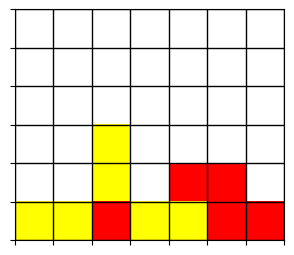

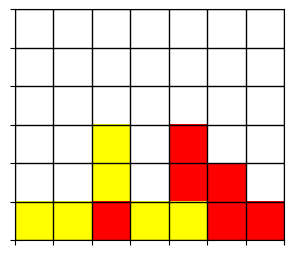

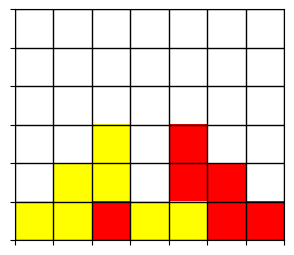

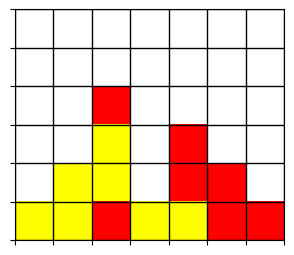

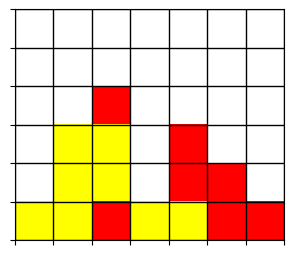

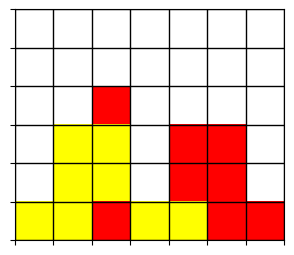

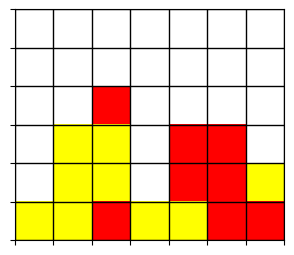

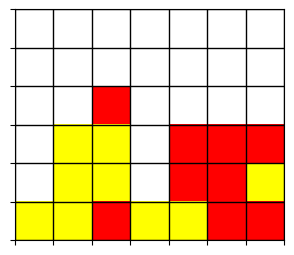

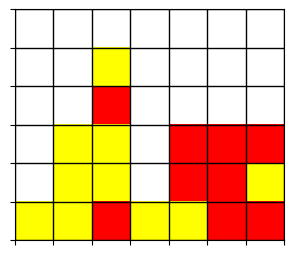

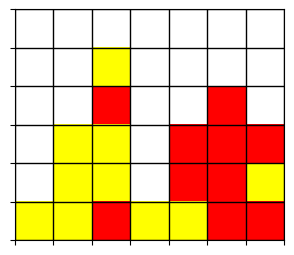

Le joueur 2 a gagné!


In [ ]:
class Puissance4:
    def __init__(self):
        self.board = [[0 for _ in range(7)] for _ in range(6)]
        self.current_player = 1

    def is_valid_action(self, action):
        return self.board[5][action] == 0

    def apply_action(self, action):
        for i in range(6):
            if self.board[i][action] == 0:
                self.board[i][action] = self.current_player
                break
        self.current_player = 3 - self.current_player

    def check_winner(self):
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    continue
                for dr, dc in directions:
                    if self.check_four_in_a_row(row, col, dr, dc):
                        return self.board[row][col]
        return 0

    def check_four_in_a_row(self, row, col, dr, dc):
        player = self.board[row][col]
        for _ in range(3):
            row += dr
            col += dc
            if (
                row < 0
                or row >= 6
                or col < 0
                or col >= 7
                or self.board[row][col] != player
            ):
                return False
        return True

    def is_draw(self):
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    return False
        return True

    def print_board(self):
        for row in self.board:
            print(" ".join(str(cell) for cell in row))
        print("-" * 7)

    def visualisation(self):
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.imshow(np.flipud(self.board), cmap=mcolors.ListedColormap(['white', 'yellow', 'red']))
        ax.grid(True, which='both', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, 7, 1))
        ax.set_yticks(np.arange(-0.5, 6, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def random_action(self):
        valid_actions = [action for action in range(7) if self.is_valid_action(action)]
        return random.choice(valid_actions)

    def play(self):
        while True:
            self.visualisation()
            action = self.random_action()

            self.apply_action(action)
            winner = self.check_winner()
            if winner != 0:
                self.visualisation()
                print(f"Le joueur {winner} a gagné!")
                break
            if self.is_draw():
                self.visualisation()
                print("Match nul!")
                break

if __name__ == "__main__":
    game = Puissance4()
    game.play()

## Partie classique de Puissance 4 entre Random agent et Q-Learning **agent**

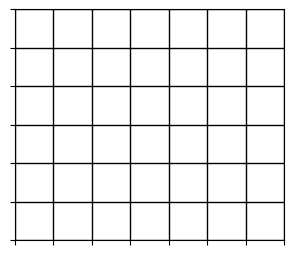

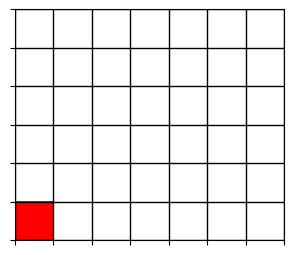

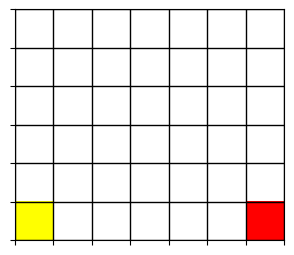

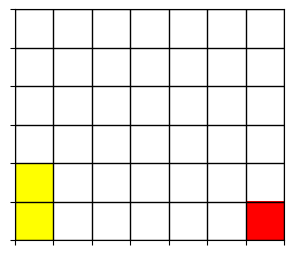

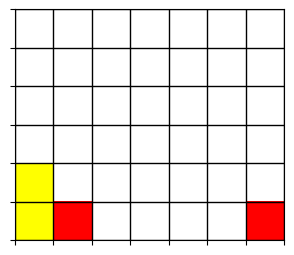

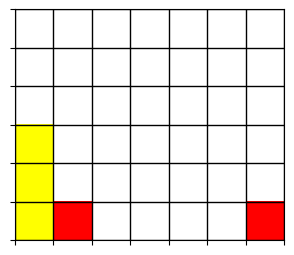

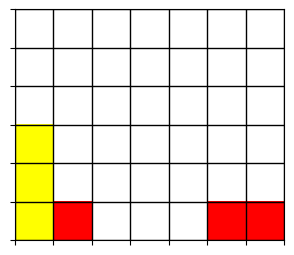

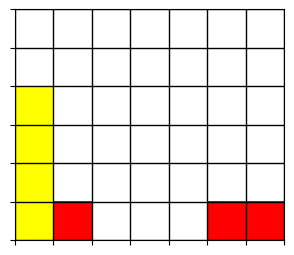

Le Q-Learning Agent a gagné!

Le Q-Learning Agent a gagné 1/1 parties, soit: 100.00%


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class QAgent:
    def __init__(self, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}

    def state_to_str(self, state):
        return str(state)

    def get_q_value(self, state, action):
        state_str = self.state_to_str(state)
        return self.q_table.get((state_str, action), 0.0)

    def set_q_value(self, state, action, value):
        state_str = self.state_to_str(state)
        self.q_table[(state_str, action)] = value

    def choose_action(self, state, valid_actions):
        if random.random() < self.epsilon:
            return random.choice(valid_actions)
        else:
            q_values = [self.get_q_value(state, action) for action in valid_actions]
            return valid_actions[np.argmax(q_values)]

    def learn(self, old_state, action, reward, new_state, game_over):
        old_q_value = self.get_q_value(old_state, action)
        if game_over:
            target = reward
        else:
            new_valid_actions = [a for a in range(7) if new_state.is_valid_action(a)]
            target = reward + self.gamma * max([self.get_q_value(new_state.board, a) for a in new_valid_actions])

        new_q_value = old_q_value + self.alpha * (target - old_q_value)
        self.set_q_value(old_state, action, new_q_value)

class Puissance4:
    def __init__(self):
        self.board = [[0 for _ in range(7)] for _ in range(6)]
        self.current_player = 1

    def is_valid_action(self, action):
        return self.board[5][action] == 0

    def apply_action(self, action):
        for i in range(6):
            if self.board[i][action] == 0:
                self.board[i][action] = self.current_player
                break
        self.current_player = 3 - self.current_player

    def check_winner(self):
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    continue
                for dr, dc in directions:
                    if self.check_four_in_a_row(row, col, dr, dc):
                        return self.board[row][col]
        return 0

    def check_four_in_a_row(self, row, col, dr, dc):
        player = self.board[row][col]
        for _ in range(3):
            row += dr
            col += dc
            if (
                row < 0
                or row >= 6
                or col < 0
                or col >= 7
                or self.board[row][col] != player
            ):
                return False
        return True

    def is_draw(self):
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    return False
        return True

    def print_board(self):
        for row in self.board:
            print(" ".join(str(cell) for cell in row))
        print("-" * 7)

    def visualisation(self):
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.imshow(np.flipud(self.board), cmap=mcolors.ListedColormap(['white', 'yellow', 'red']))
        ax.grid(True, which='both', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, 7, 1))
        ax.set_yticks(np.arange(-0.5, 6, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def random_action(self):
        valid_actions = [a for a in range(7) if self.is_valid_action(a)]
        return random.choice(valid_actions)

    def play(self, q_agent, num_episodes):
        q_agent_wins = 0

        for episode in range(num_episodes):
            while True:
                self.visualisation()

                if self.current_player == 1:
                    action = q_agent.choose_action(self.board, [a for a in range(7) if self.is_valid_action(a)])

                else:
                    action = self.random_action()

                old_board = [row.copy() for row in self.board]
                self.apply_action(action)
                winner = self.check_winner()

                if winner != 0:
                    self.visualisation()
                    if winner == 1:
                        print("Le Q-Learning Agent a gagné!")
                        q_agent_wins += 1
                    else:
                        print("Le Random Agent a gagné!")
                    q_agent.learn(old_board, action, 1 if winner == 1 else -1, self, True)
                    break

                if self.is_draw():
                    self.visualisation()
                    print("Match nul!")
                    q_agent.learn(old_board, action, 0, self, True)
                    break

            self.board = [[0 for _ in range(7)] for _ in range(6)]
            self.current_player = 1

        print(f"\nLe Q-Learning Agent a gagné {q_agent_wins}/{num_episodes} parties, soit: {q_agent_wins / num_episodes * 100:.2f}%")


if __name__ == "__main__":
    game = Puissance4()
    q_agent = QAgent()
    game.play(q_agent, num_episodes=1)

## Simulation / Apprentissage du Q-Learning Agent sur 5, 10, 20, 50, 100, 500, 1000 parties

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class QAgent:
    def __init__(self, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}

    def state_to_str(self, state):
        return str(state)

    def get_q_value(self, state, action):
        state_str = self.state_to_str(state)
        return self.q_table.get((state_str, action), 0.0)

    def set_q_value(self, state, action, value):
        state_str = self.state_to_str(state)
        self.q_table[(state_str, action)] = value

    def choose_action(self, state, valid_actions):
        if random.random() < self.epsilon:
            return random.choice(valid_actions)
        else:
            q_values = [self.get_q_value(state, action) for action in valid_actions]
            return valid_actions[np.argmax(q_values)]

    def learn(self, old_state, action, reward, new_state, game_over):
        old_q_value = self.get_q_value(old_state, action)
        if game_over:
            target = reward
        else:
            new_valid_actions = [a for a in range(7) if new_state.is_valid_action(a)]
            target = reward + self.gamma * max([self.get_q_value(new_state.board, a) for a in new_valid_actions])

        new_q_value = old_q_value + self.alpha * (target - old_q_value)
        self.set_q_value(old_state, action, new_q_value)

class Puissance4:
    def __init__(self):
        self.board = [[0 for _ in range(7)] for _ in range(6)]
        self.current_player = 1

    def is_valid_action(self, action):
        return self.board[5][action] == 0

    def apply_action(self, action):
        for i in range(6):
            if self.board[i][action] == 0:
                self.board[i][action] = self.current_player
                break
        self.current_player = 3 - self.current_player

    def check_winner(self):
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    continue
                for dr, dc in directions:
                    if self.check_four_in_a_row(row, col, dr, dc):
                        return self.board[row][col]
        return 0

    def check_four_in_a_row(self, row, col, dr, dc):
        player = self.board[row][col]
        for _ in range(3):
            row += dr
            col += dc
            if (
                row < 0
                or row >= 6
                or col < 0
                or col >= 7
                or self.board[row][col] != player
            ):
                return False
        return True

    def is_draw(self):
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    return False
        return True

    def print_board(self):
        for row in self.board:
            print(" ".join(str(cell) for cell in row))
        print("-" * 7)

    def visualisation(self):
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.imshow(np.flipud(self.board), cmap=mcolors.ListedColormap(['white', 'yellow', 'red']))
        ax.grid(True, which='both', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, 7, 1))
        ax.set_yticks(np.arange(-0.5, 6, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def random_action(self):
        valid_actions = [a for a in range(7) if self.is_valid_action(a)]
        return random.choice(valid_actions)

    def play(self, q_agent, num_episodes, visualize=False):
        q_agent_wins = 0
        for episode in range(num_episodes):
            while True:
                if visualize:
                    self.visualisation()

                if self.current_player == 1:
                    action = q_agent.choose_action(self.board, [a for a in range(7) if self.is_valid_action(a)])
                else:
                    action = self.random_action()

                old_board = [row.copy() for row in self.board]
                self.apply_action(action)
                winner = self.check_winner()

                if winner != 0:
                    if visualize:
                        self.visualisation()
                        print(f"Le joueur {winner} a gagné!")
                    if winner == 1:
                        q_agent_wins += 1
                    q_agent.learn(old_board, action, 1 if winner == 1 else -1, self, True)
                    break

                if self.is_draw():
                    if visualize:
                        self.visualisation()
                        print("Match nul!")
                    q_agent.learn(old_board, action, 0, self, True)
                    break

            self.board = [[0 for _ in range(7)] for _ in range(6)]
            self.current_player = 1

        return q_agent_wins


if __name__ == "__main__":
    game = Puissance4()
    q_agent = QAgent()
    num_episodes_list = [5, 10, 20, 50, 100,200,500,1000]

    for num_episodes in num_episodes_list:
        q_agent_wins = game.play(q_agent, num_episodes, visualize=False)
        print(f"Sur un échantillon de {num_episodes} parties, Le Q-Learning Agent a gagné {q_agent_wins} / {num_episodes} des parties soit {q_agent_wins / num_episodes * 100:.2f}%")

Sur un échantillon de 5 parties, Le Q-Learning Agent a gagné 5 / 5 des parties soit 100.00%
Sur un échantillon de 10 parties, Le Q-Learning Agent a gagné 7 / 10 des parties soit 70.00%
Sur un échantillon de 20 parties, Le Q-Learning Agent a gagné 19 / 20 des parties soit 95.00%
Sur un échantillon de 50 parties, Le Q-Learning Agent a gagné 41 / 50 des parties soit 82.00%
Sur un échantillon de 100 parties, Le Q-Learning Agent a gagné 86 / 100 des parties soit 86.00%
Sur un échantillon de 200 parties, Le Q-Learning Agent a gagné 161 / 200 des parties soit 80.50%
Sur un échantillon de 500 parties, Le Q-Learning Agent a gagné 407 / 500 des parties soit 81.40%
Sur un échantillon de 1000 parties, Le Q-Learning Agent a gagné 819 / 1000 des parties soit 81.90%


On semble atteindre un certain plafond environ de 82-83% de victoire sur un nombre assez conséquent de parties.

## Partie classique de Puissance 4 entre Random agent et Deep-Q Learning

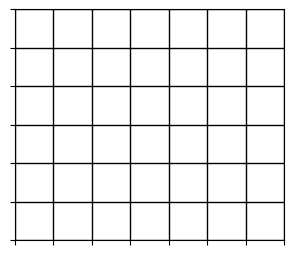

1/1 [==============================] - 0s 101ms/step


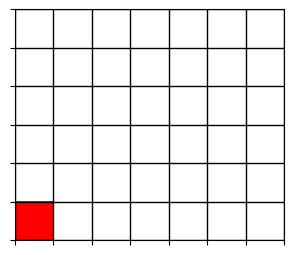

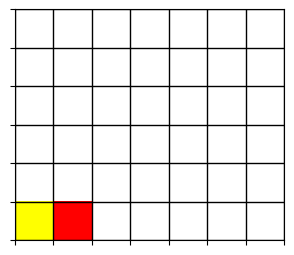

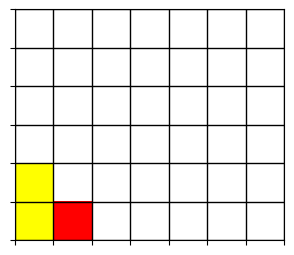

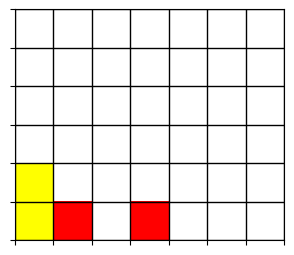

1/1 [==============================] - 0s 35ms/step


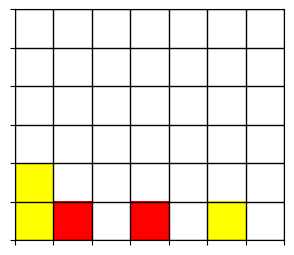

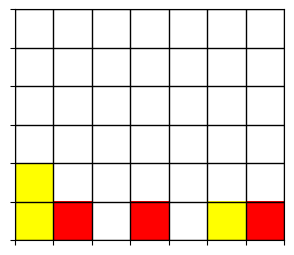

1/1 [==============================] - 0s 32ms/step


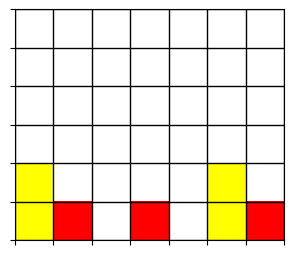

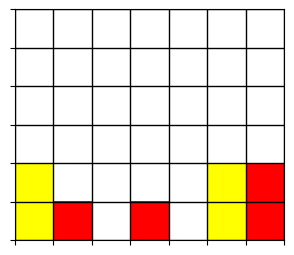

1/1 [==============================] - 0s 33ms/step


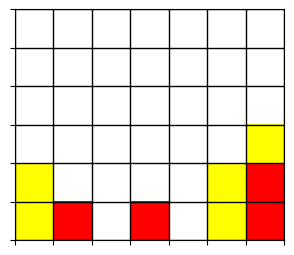

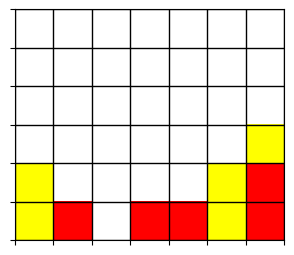

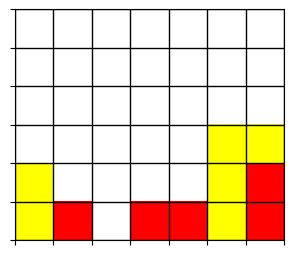

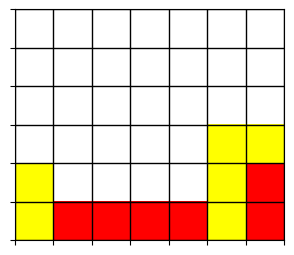

Le Random Agent a gagné!
1/1 [==============================] - 0s 22ms/step

Le Deep Q-Learning Agent a gagné 0/1 parties, soit: 0.00%


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class DQNAgent:
    def __init__(self, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(42, input_dim=42, activation='relu'))
        model.add(Dense(42, activation='relu'))
        model.add(Dense(7, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.alpha))
        return model

    def state_to_input(self, state):
        return np.array(state).reshape(1, -1)

    def choose_action(self, state, valid_actions):
        if random.random() < self.epsilon:
            return random.choice(valid_actions)
        else:
            q_values = self.model.predict(self.state_to_input(state))
            valid_q_values = [q_values[0, action] for action in valid_actions]
            return valid_actions[np.argmax(valid_q_values)]

    def learn(self, old_state, action, reward, new_state, game_over):
        old_q_values = self.model.predict(self.state_to_input(old_state))
        new_q_values = self.model.predict(self.state_to_input(new_state.board))
        target_q_values = old_q_values.copy()
        if game_over:
            target_q_values[0, action] = reward
        else:
            valid_actions = [a for a in range(7) if new_state.is_valid_action(a)]
            target_q_values[0, action] = reward + self.gamma * max([new_q_values[0, a] for a in valid_actions])

        self.model.fit(self.state_to_input(old_state), target_q_values, epochs=1, verbose=0)


class Puissance4:
    def __init__(self):
        self.board = [[0 for _ in range(7)] for _ in range(6)]
        self.current_player = 1

    def is_valid_action(self, action):
        return self.board[5][action] == 0

    def apply_action(self, action):
        for i in range(6):
            if self.board[i][action] == 0:
                self.board[i][action] = self.current_player
                break
        self.current_player = 3 - self.current_player

    def check_winner(self):
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    continue
                for dr, dc in directions:
                    if self.check_four_in_a_row(row, col, dr, dc):
                        return self.board[row][col]
        return 0

    def check_four_in_a_row(self, row, col, dr, dc):
        player = self.board[row][col]
        for _ in range(3):
            row += dr
            col += dc
            if (
                row < 0
                or row >= 6
                or col < 0
                or col >= 7
                or self.board[row][col] != player
            ):
                return False
        return True

    def is_draw(self):
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    return False
        return True

    def print_board(self):
        for row in self.board:
            print(" ".join(str(cell) for cell in row))
        print("-" * 7)

    def visualisation(self):
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.imshow(np.flipud(self.board), cmap=mcolors.ListedColormap(['white', 'yellow', 'red']))
        ax.grid(True, which='both', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, 7, 1))
        ax.set_yticks(np.arange(-0.5, 6, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def random_action(self):
        valid_actions = [a for a in range(7) if self.is_valid_action(a)]
        return random.choice(valid_actions)

    def play(self, q_agent, num_episodes):
        deep_q_agent_wins = 0

        for episode in range(num_episodes):
            while True:
                self.visualisation()

                if self.current_player == 1:
                    action = q_agent.choose_action(self.board, [a for a in range(7) if self.is_valid_action(a)])
                else:
                    action = self.random_action()

                old_board = [row.copy() for row in self.board]
                self.apply_action(action)
                winner = self.check_winner()

                if winner != 0:
                    self.visualisation()
                    if winner == 1:
                        print("Le Deep Q-Learning Agent a gagné!")
                        deep_q_agent_wins += 1
                    else:
                        print("Le Random Agent a gagné!")
                    q_agent.learn(old_board, action, 1 if winner == 1 else -1, self, True)
                    break

                if self.is_draw():
                    self.visualisation()
                    print("Match nul!")
                    q_agent.learn(old_board, action, 0, self, True)
                    break

            self.board = [[0 for _ in range(7)] for _ in range(6)]
            self.current_player = 1

        print(f"\nLe Deep Q-Learning Agent a gagné {deep_q_agent_wins}/{num_episodes} parties, soit: {deep_q_agent_wins / num_episodes * 100:.2f}%")

if __name__ == "__main__":
    game = Puissance4()
    dqn_agent = DQNAgent()
    game.play(dqn_agent, num_episodes=1)


## Simulation / Apprentissage du Deep Q-Learning Agent sur 5, 10, 20, 100 parties

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


class DQNAgent:
    def __init__(self, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(42, input_dim=42, activation='relu'))
        model.add(Dense(42, activation='relu'))
        model.add(Dense(7, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.alpha))
        return model

    def state_to_input(self, state):
        return np.array(state).reshape(1, -1)

    def choose_action(self, state, valid_actions):
        if random.random() < self.epsilon:
            return random.choice(valid_actions)
        else:
            q_values = self.model.predict(self.state_to_input(state))
            valid_q_values = [q_values[0, action] for action in valid_actions]
            return valid_actions[np.argmax(valid_q_values)]

    def learn(self, old_state, action, reward, new_state, game_over):
        old_q_values = self.model.predict(self.state_to_input(old_state))
        new_q_values = self.model.predict(self.state_to_input(new_state.board))
        target_q_values = old_q_values.copy()
        if game_over:
            target_q_values[0, action] = reward
        else:
            valid_actions = [a for a in range(7) if new_state.is_valid_action(a)]
            target_q_values[0, action] = reward + self.gamma * max([new_q_values[0, a] for a in valid_actions])

        self.model.fit(self.state_to_input(old_state), target_q_values, epochs=1, verbose=0)


class Puissance4:
    def __init__(self):
        self.board = [[0 for _ in range(7)] for _ in range(6)]
        self.current_player = 1

    def is_valid_action(self, action):
        return self.board[5][action] == 0

    def apply_action(self, action):
        for i in range(6):
            if self.board[i][action] == 0:
                self.board[i][action] = self.current_player
                break
        self.current_player = 3 - self.current_player

    def check_winner(self):
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    continue
                for dr, dc in directions:
                    if self.check_four_in_a_row(row, col, dr, dc):
                        return self.board[row][col]
        return 0

    def check_four_in_a_row(self, row, col, dr, dc):
        player = self.board[row][col]
        for _ in range(3):
            row += dr
            col += dc
            if (
                row < 0
                or row >= 6
                or col < 0
                or col >= 7
                or self.board[row][col] != player
            ):
                return False
        return True

    def is_draw(self):
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    return False
        return True

    def print_board(self):
        for row in self.board:
            print(" ".join(str(cell) for cell in row))
        print("-" * 7)

    def visualisation(self):
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.imshow(np.flipud(self.board), cmap=mcolors.ListedColormap(['white', 'yellow', 'red']))
        ax.grid(True, which='both', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, 7, 1))
        ax.set_yticks(np.arange(-0.5, 6, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def random_action(self):
        valid_actions = [a for a in range(7) if self.is_valid_action(a)]
        return random.choice(valid_actions)

    def play(self, q_agent, num_episodes, visualize=False):
        deep_q_agent_wins = 0
        for episode in range(num_episodes):
            while True:
                if visualize:
                    self.visualisation()

                if self.current_player == 1:
                    action = q_agent.choose_action(self.board, [a for a in range(7) if self.is_valid_action(a)])
                else:
                    action = self.random_action()

                old_board = [row.copy() for row in self.board]
                self.apply_action(action)
                winner = self.check_winner()

                if winner != 0:
                    if visualize:
                        self.visualisation()
                        print(f"Le joueur {winner} a gagné!")
                    if winner == 1:
                        deep_q_agent_wins += 1
                    q_agent.learn(old_board, action, 1 if winner == 1 else -1, self, True)
                    break

                if self.is_draw():
                    if visualize:
                        self.visualisation()
                        print("Match nul!")
                    q_agent.learn(old_board, action, 0, self, True)
                    break

            self.board = [[0 for _ in range(7)] for _ in range(6)]
            self.current_player = 1

        return deep_q_agent_wins

if __name__ == "__main__":
    game = Puissance4()
    q_agent = DQNAgent()
    num_episodes_list = [1,5,10,20,100]

    for num_episodes in num_episodes_list:
        q_agent_wins = game.play(q_agent, num_episodes, visualize=False)
        print(f"Sur un échantillon de {num_episodes} parties, Le Deep Q-Learning Agent a gagné {q_agent_wins} / {num_episodes} des parties soit {q_agent_wins / num_episodes * 100:.2f}%")


1/1 [==============================] - 0s 31ms/step
Sur un échantillon de 1 parties, Le Q-Learning Agent a gagné 0 / 1 des parties soit 0.00%
1/1 [==============================] - 0s 21ms/step
Sur un échantillon de 5 parties, Le Q-Learning Agent a gagné 5 / 5 des parties soit 100.00%
1/1 [==============================] - 0s 21ms/step
Sur un échantillon de 10 parties, Le Q-Learning Agent a gagné 10 / 10 des parties soit 100.00%
1/1 [==============================] - 0s 25ms/step
Sur un échantillon de 20 parties, Le Q-Learning Agent a gagné 15 / 20 des parties soit 75.00%
1/1 [==============================] - 0s 25ms/step
Sur un échantillon de 100 parties, Le Q-Learning Agent a gagné 87 / 100 des parties soit 87.00%


## Optimisation Deep Q-Learning Agent et Simulation sur 200 parties

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


class DQNAgent:
    def __init__(self, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(42, input_dim=42, activation='relu'))
        model.add(Dense(42, activation='relu'))
        model.add(Dense(42, activation='relu'))
        model.add(Dense(42, activation='relu'))
        model.add(Dense(7, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.alpha))
        return model


    def state_to_input(self, state):
        return np.array(state).reshape(1, -1)

    def choose_action(self, state, valid_actions):
        if random.random() < self.epsilon:
            return random.choice(valid_actions)
        else:
            q_values = self.model.predict(self.state_to_input(state))
            valid_q_values = [q_values[0, action] for action in valid_actions]
            return valid_actions[np.argmax(valid_q_values)]

    def learn(self, old_state, action, reward, new_state, game_over):
        old_q_values = self.model.predict(self.state_to_input(old_state))
        new_q_values = self.model.predict(self.state_to_input(new_state.board))
        target_q_values = old_q_values.copy()
        if game_over:
            target_q_values[0, action] = reward
        else:
            valid_actions = [a for a in range(7) if new_state.is_valid_action(a)]
            target_q_values[0, action] = reward + self.gamma * max([new_q_values[0, a] for a in valid_actions])

        self.model.fit(self.state_to_input(old_state), target_q_values, epochs=1, verbose=0)


class Puissance4:
    def __init__(self):
        self.board = [[0 for _ in range(7)] for _ in range(6)]
        self.current_player = 1

    def is_valid_action(self, action):
        return self.board[5][action] == 0

    def apply_action(self, action):
        for i in range(6):
            if self.board[i][action] == 0:
                self.board[i][action] = self.current_player
                break
        self.current_player = 3 - self.current_player

    def check_winner(self):
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    continue
                for dr, dc in directions:
                    if self.check_four_in_a_row(row, col, dr, dc):
                        return self.board[row][col]
        return 0

    def check_four_in_a_row(self, row, col, dr, dc):
        player = self.board[row][col]
        for _ in range(3):
            row += dr
            col += dc
            if (
                row < 0
                or row >= 6
                or col < 0
                or col >= 7
                or self.board[row][col] != player
            ):
                return False
        return True

    def is_draw(self):
        for row in range(6):
            for col in range(7):
                if self.board[row][col] == 0:
                    return False
        return True

    def print_board(self):
        for row in self.board:
            print(" ".join(str(cell) for cell in row))
        print("-" * 7)

    def visualisation(self):
        fig, ax = plt.subplots(figsize=(4, 3))
        ax.imshow(np.flipud(self.board), cmap=mcolors.ListedColormap(['white', 'yellow', 'red']))
        ax.grid(True, which='both', color='black', linewidth=1)
        ax.set_xticks(np.arange(-0.5, 7, 1))
        ax.set_yticks(np.arange(-0.5, 6, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.show()

    def random_action(self):
        valid_actions = [a for a in range(7) if self.is_valid_action(a)]
        return random.choice(valid_actions)

    def play(self, q_agent, num_episodes, visualize=False):
        deep_q_agent_wins = 0
        for episode in range(num_episodes):
            while True:
                if visualize:
                    self.visualisation()

                if self.current_player == 1:
                    action = q_agent.choose_action(self.board, [a for a in range(7) if self.is_valid_action(a)])
                else:
                    action = self.random_action()

                old_board = [row.copy() for row in self.board]
                self.apply_action(action)
                winner = self.check_winner()

                if winner != 0:
                    if visualize:
                        self.visualisation()
                        print(f"Le joueur {winner} a gagné!")
                    if winner == 1:
                        deep_q_agent_wins += 1
                    q_agent.learn(old_board, action, 1 if winner == 1 else -1, self, True)
                    break

                if self.is_draw():
                    if visualize:
                        self.visualisation()
                        print("Match nul!")
                    q_agent.learn(old_board, action, 0, self, True)
                    break

            self.board = [[0 for _ in range(7)] for _ in range(6)]
            self.current_player = 1

        return deep_q_agent_wins

if __name__ == "__main__":
    game = Puissance4()
    q_agent = DQNAgent()
    num_episodes_list = [200]

    for num_episodes in num_episodes_list:
        q_agent_wins = game.play(q_agent, num_episodes, visualize=False)
        print(f"Sur un échantillon de {num_episodes} parties, Le Deep Q-Learning Agent a gagné {q_agent_wins} / {num_episodes} des parties soit {q_agent_wins / num_episodes * 100:.2f}%")


1/1 [==============================] - 0s 20ms/step
Sur un échantillon de 200 parties, Le Deep Q-Learning Agent a gagné 171 / 200 des parties soit 85.50%


# Conclusion

In [ ]:
# L'agent Deep-Q Learning a obtenu les meilleurs performances, avec près de 85% de victoires sur seulement 200 parties d'échantillon
# Sachant que notre seule optimisation par gain de temps a été de rajouter quelques couches, cela laisse à explorer
# que ce soit en optimisant le paramètre epsilon, gamma, l'optimiseur, le nombre de couches, le taux d'apprentissage

# On peut aussi penser que sur un plus grand nombre d'échantillon on obtienne de meilleures performances car les modèles reposant sur des réseaux de neurones nécessitent
# un nombre conséquent d'observations.